In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [63]:
df = pd.read_csv('../../Datasets/car price/CarPrice_Assignment.csv')
df = df.drop('car_ID', axis=1)
df = df.drop('CarName', axis=1)

In [7]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [8]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [11]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


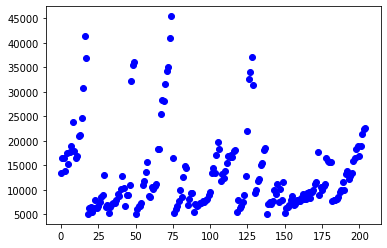

In [12]:
plt.plot(df.price, 'bo')

Text(0, 0.5, 'carheight')

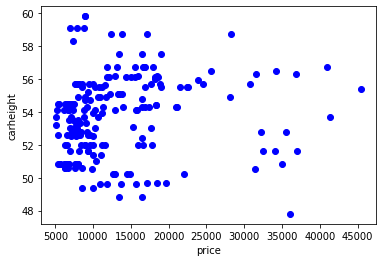

In [13]:
plt.plot(df.price, df.carheight, 'bo')
plt.xlabel('price')
plt.ylabel('carheight')

In [14]:
df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [15]:
df.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [17]:
def pow2(a):
    return a ** 2


b = [1, 2, 3, 4, 5]

list(map(pow2, b))

[1, 4, 9, 16, 25]

In [30]:
def t(x):
    if x == 'gas':
        return 1
    else:
        return 0

#df.fueltype.map(t)

df.fueltype = df.fueltype.map(lambda x: 0 if x == 'gas' else 1)

In [31]:
df.fueltype.value_counts()

0    185
1     20
Name: fueltype, dtype: int64

In [30]:
df.fueltype[df.fueltype == 'gas'] = 0
df.fueltype[df.fueltype == 'diesel'] = 1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
df.fueltype.value_counts()

0    185
1     20
Name: fueltype, dtype: int64

In [34]:
df.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [36]:
df.fueltype

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fueltype, Length: 205, dtype: object

In [45]:
pd.get_dummies(df, prefix=['fueltype'], columns=['fueltype'], drop_first=True)

,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas
0,3,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,3,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,1,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,2,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,2,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,1
201,-1,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,1
202,-1,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,1
203,-1,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,0


In [47]:
for c in df.columns:
    if df[c].dtype == 'object':
        print('-' * 10)
        print(c)
        print(df[c].value_counts())

----------
fueltype
gas       185
diesel     20
Name: fueltype, dtype: int64
----------
aspiration
std      168
turbo     37
Name: aspiration, dtype: int64
----------
doornumber
four    115
two      90
Name: doornumber, dtype: int64
----------
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
----------
drivewheel
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
----------
enginelocation
front    202
rear       3
Name: enginelocation, dtype: int64
----------
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
----------
cylindernumber
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64
----------
fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64


In [48]:
binary_columns = ['enginelocation', 'doornumber', 'aspiration', 'fueltype']
df = pd.get_dummies(df, prefix=binary_columns, columns=binary_columns , drop_first=True)

In [49]:
df.head(5)

,symboling,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,enginelocation_rear,doornumber_two,aspiration_turbo,fueltype_gas
0,3,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,...,9.0,111,5000,21,27,13495.0,0,1,0,1
1,3,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,...,9.0,111,5000,21,27,16500.0,0,1,0,1
2,1,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,...,9.0,154,5000,19,26,16500.0,0,1,0,1
3,2,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,...,10.0,102,5500,24,30,13950.0,0,0,0,1
4,2,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,...,8.0,115,5500,18,22,17450.0,0,0,0,1


In [50]:
for c in df.columns:
    if df[c].dtype == 'object':
        print('-' * 10)
        print(c)
        print(len(df[c].value_counts()))

----------
carbody
5
----------
drivewheel
3
----------
enginetype
7
----------
cylindernumber
7
----------
fuelsystem
8


In [64]:
binary_columns = []
categorical_columns = []

for c in df.columns:
    if df[c].dtype == 'object':
        if len(df[c].value_counts()) == 2:
            binary_columns.append(c)
        elif len(df[c].value_counts()) > 2:
            categorical_columns.append(c)
print(binary_columns)
print(categorical_columns)

['fueltype', 'aspiration', 'doornumber', 'enginelocation']
['carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem']


In [65]:
df = pd.get_dummies(df, prefix=binary_columns, columns=binary_columns , drop_first=True)
df = pd.get_dummies(df, prefix=categorical_columns, columns=categorical_columns)

In [66]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [55]:
df.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two',
       'enginelocation_rear', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [67]:
y = df.price.to_numpy().reshape(-1, 1)
df = df.drop('price', axis=1)
X = df.to_numpy()

In [68]:
print(X.shape)
print(y.shape)

(205, 48)
(205, 1)


In [69]:
lr_model = LinearRegression(normalize=True)
lr_model.fit(X, y)
print(lr_model.coef_, lr_model.intercept_)

[[ 7.38777999e+01  4.88156162e+01 -6.13023424e+01  6.93572842e+02
   8.94346889e+01  3.94188972e+00  1.17363598e+02 -1.88233758e+03
  -4.45376404e+03 -8.00321643e+02  9.79132176e+00  2.20209706e+00
  -1.47749106e+02  1.91609000e+02 -5.66555506e+03  1.62601750e+03
   1.87600575e+02  7.69502367e+03  2.69525467e+03 -5.11780307e+02
  -5.85579390e+02  5.43659219e+02 -5.70376253e+02 -4.99841387e+02
  -4.25792743e+02  5.32925967e+02 -7.95846150e+02 -7.98513716e+03
  -1.84692543e+03  2.32980026e+03  4.37811204e+02 -6.40110401e+03
   3.51346478e+03  7.89202786e+03 -1.38833715e+03 -1.98706043e+03
   1.32199758e+03  7.42911220e+03 -2.34842372e+03  3.51346478e+03
  -4.44340638e+02 -4.83409042e+02 -2.06796111e+03  5.66555506e+03
  -3.92404316e+03 -6.88708085e+02 -3.47109329e+03 -1.06303086e+03]] [-37213.01028782]


In [70]:
h = lr_model.predict(X)
MSE = np.mean((y - h) ** 2) / 2
print(MSE ** 0.5)

1385.5414383579039
